In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [2]:
df = pd.read_csv(r"Pokemon.csv")

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.shape

(800, 13)

In [5]:
df.drop('#' , axis = 1 , inplace = True)   # removing '#' column because indexing already done

In [6]:
df.shape

(800, 12)

In [7]:
df.describe(include = 'all')

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800,800,414,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,800,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Clefairy,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,NaN,NaN,NaN,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,NaN,NaN,NaN,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,NaN,NaN,NaN,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,NaN,NaN,NaN,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,NaN,NaN,NaN,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,NaN,NaN,NaN,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


In [8]:
df["Type 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [9]:
df["Type 2"].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [10]:
df["Type 1"].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ghost        32
Ground       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [11]:
df["Type 2"].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ice         14
Water       14
Rock        14
Ghost       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [12]:
df.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [13]:
df['Type 2'].fillna(df['Type 1'], inplace=True)    # replacing the NaN values of type 2 with type 1

In [14]:
df.isnull().sum()

Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [15]:
# NaN values removed

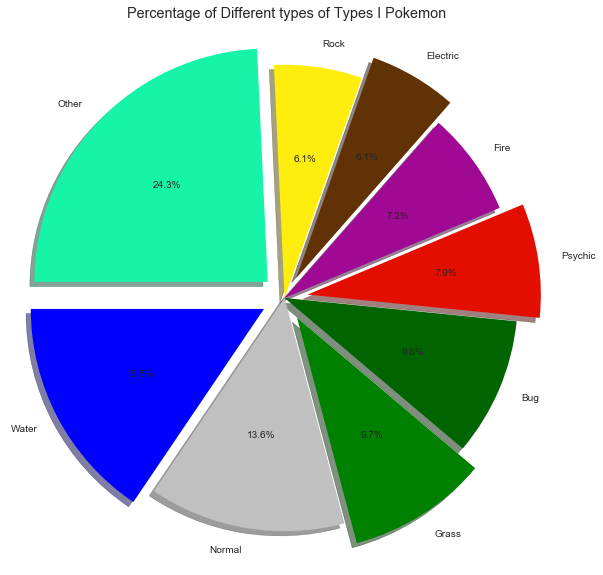

In [16]:
labels = 'Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Other'
sizes = [112, 98, 70, 69, 57, 52, 44, 44, 175]
colors = ['B', 'silver', 'G', '#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0.0, 0.1, 0, 0.1) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Percentage of Different types of Types I Pokemon")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

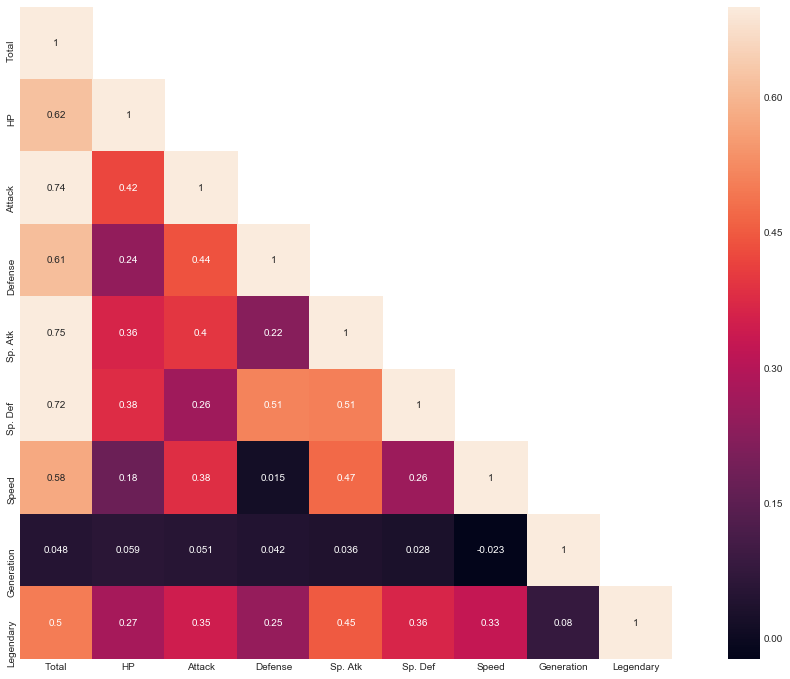

In [17]:
correlation_map = df[['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,12)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

In [18]:
# this shows 
# 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed' are highly correlated to total.

In [19]:
#self relation would always be equal to 1

In [20]:
# generation is also having nearly no relation with every other variable
# so we can remove it

In [21]:
new=df.copy()
new.drop(["Total","Legendary"],axis = 1,inplace=True)
new.head()

# creating new dataframe

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1
4,Charmander,Fire,Fire,39,52,43,60,50,65,1


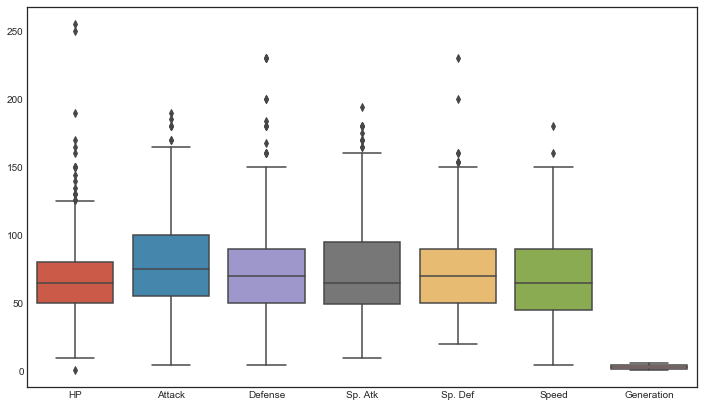

In [22]:


figure = plt.figure(figsize=(12,7))
sns.boxplot(data=new)



In [23]:
df.groupby("Type 1")["Defense"].mean()

Type 1
Bug          70.724638
Dark         70.225806
Dragon       86.375000
Electric     66.295455
Fairy        65.705882
Fighting     65.925926
Fire         67.769231
Flying       66.250000
Ghost        81.187500
Grass        70.800000
Ground       84.843750
Ice          71.416667
Normal       59.846939
Poison       68.821429
Psychic      67.684211
Rock        100.795455
Steel       126.370370
Water        72.946429
Name: Defense, dtype: float64

In [24]:
df.groupby("Type 1")["Attack"].mean()

Type 1
Bug          70.971014
Dark         88.387097
Dragon      112.125000
Electric     69.090909
Fairy        61.529412
Fighting     96.777778
Fire         84.769231
Flying       78.750000
Ghost        73.781250
Grass        73.214286
Ground       95.750000
Ice          72.750000
Normal       73.469388
Poison       74.678571
Psychic      71.456140
Rock         92.863636
Steel        92.703704
Water        74.151786
Name: Attack, dtype: float64

In [25]:
# similary for other attributes we can group by as above

In [26]:
# now visualization on the basis of type1:

In [27]:
# creating a function mean_attribute, which will take attribute such as Desfense,Attack,
# etc and group them by type
# and will take the mean of each and plot a bar plot 

In [28]:
def mean_attribute(type_no,attribute,dataframe):
    a=dataframe.groupby(type_no)[attribute].mean()
    temp=pd.DataFrame(a)
    temp=temp.reset_index()
    temp = temp.sort_values(by=[attribute])
    fig, axes = plt.subplots(3,1)
    fig.set_size_inches(15, 15)
    sns.stripplot(data=df,x="Type 1",y="Total",ax=axes[0],jitter=True)
    sns.boxplot(data=df,y="Total",x="Type 1",orient="v",ax=axes[1])
    sns.barplot(temp[type_no],temp[attribute],ax=axes[2])


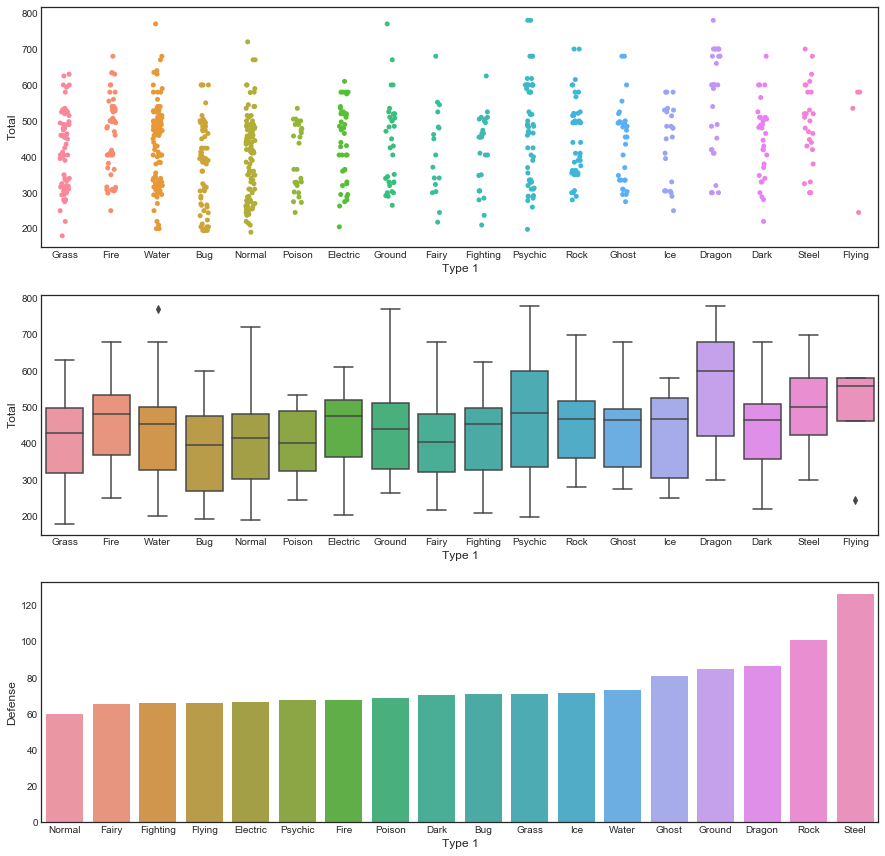

In [29]:
mean_attribute("Type 1","Defense",df)

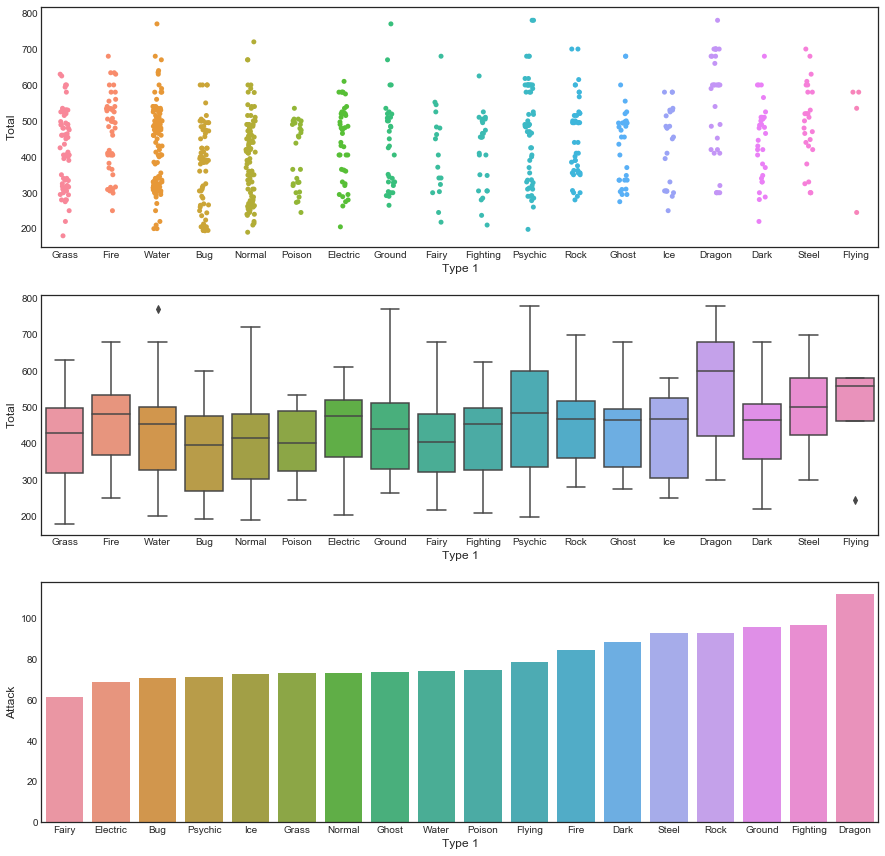

In [30]:
mean_attribute("Type 1","Attack",df)

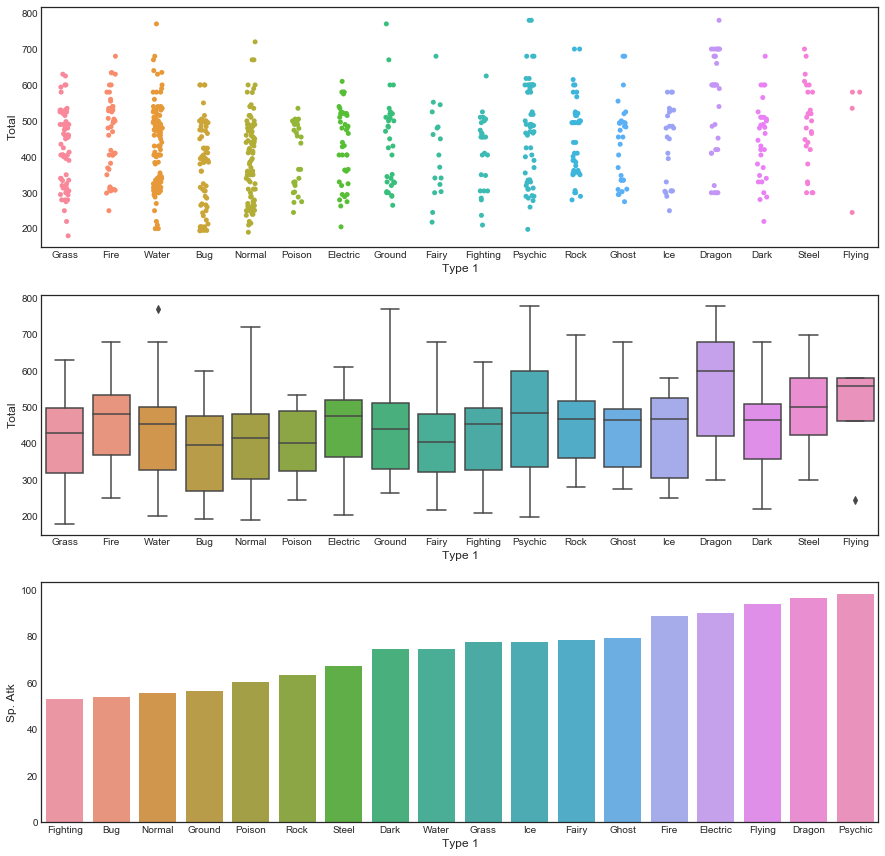

In [31]:
mean_attribute("Type 1","Sp. Atk",df)

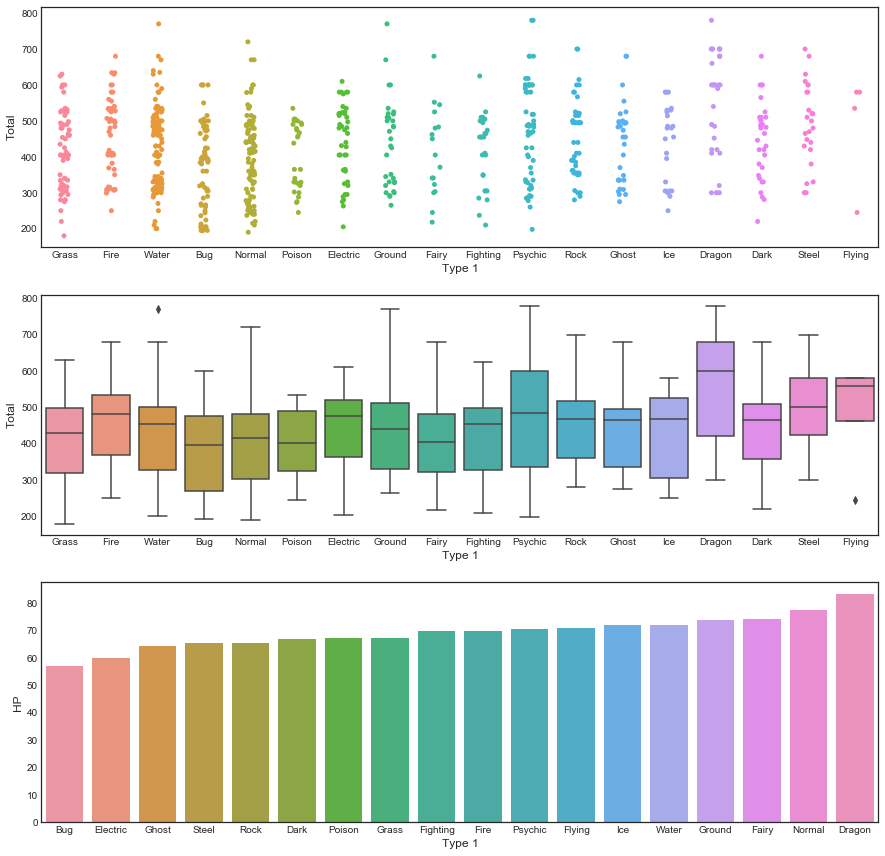

In [32]:
mean_attribute("Type 1","HP",df)

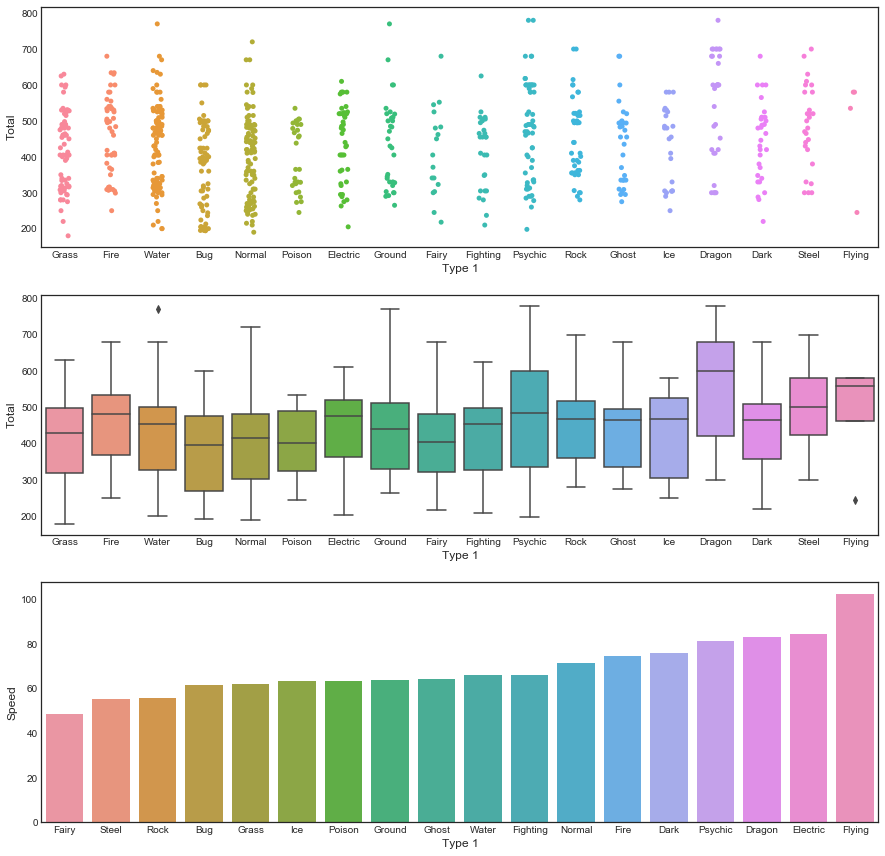

In [33]:
mean_attribute("Type 1","Speed",df)

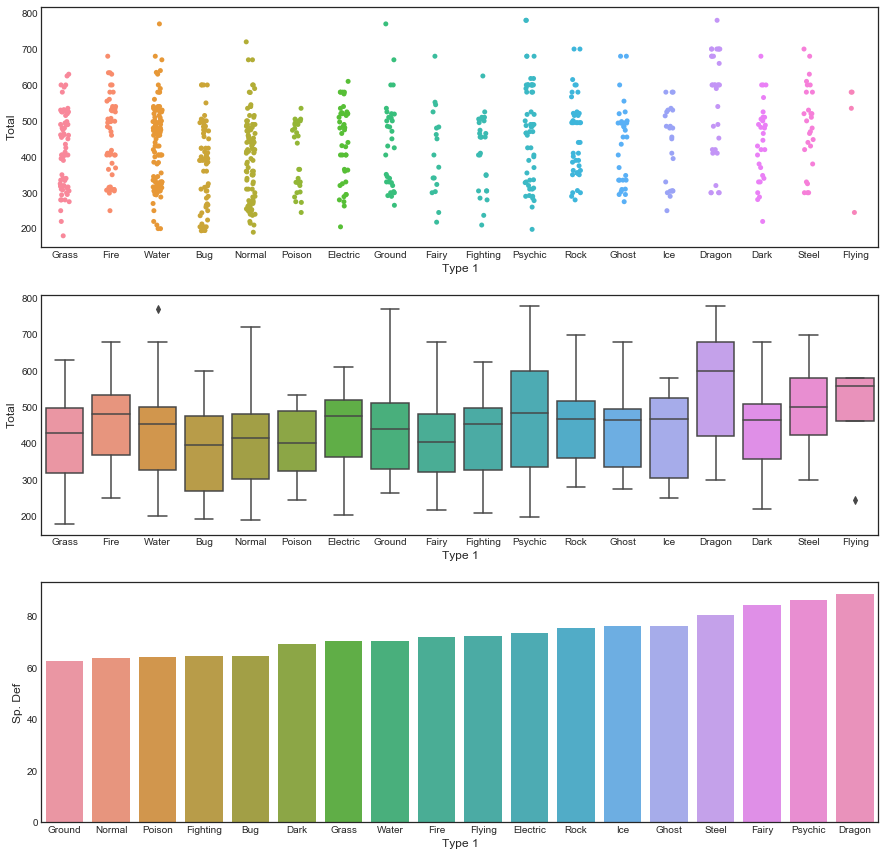

In [34]:


mean_attribute("Type 1","Sp. Def",df)

In [35]:
# similarly you can go for type2 also.

In [36]:
# since generation column was deleted by mistake in the original dataframe df
# hence the need to read the csv file again arises

In [37]:
orig = pd.read_csv(r"Pokemon.csv")      # new dataframe orig containg all the columns intact

In [38]:
orig.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [39]:
orig.shape

(800, 13)

In [40]:
orig.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [41]:
# cleaning   
orig['Type 2'].fillna(orig['Type 1'], inplace=True)    # replacing the NaN values of type 2 with type 1

In [42]:
orig.describe(include='all')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800,800,800,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,NaN,800,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Clefairy,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,112,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,362.813750,NaN,NaN,NaN,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,208.343798,NaN,NaN,NaN,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,1.000000,NaN,NaN,NaN,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,184.750000,NaN,NaN,NaN,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,364.500000,NaN,NaN,NaN,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,539.250000,NaN,NaN,NaN,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


In [43]:
#checking if Generation has any effect on total

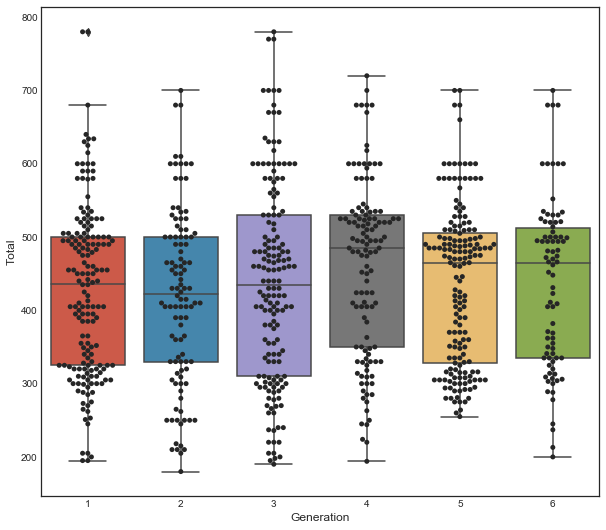

In [44]:
# using orig as our dataframe
figure = plt.figure(figsize=(10,9))
sns.boxplot(y="Total", x="Generation", data=orig)
ax = sns.swarmplot(x="Generation", y="Total", data=orig, color=".15")

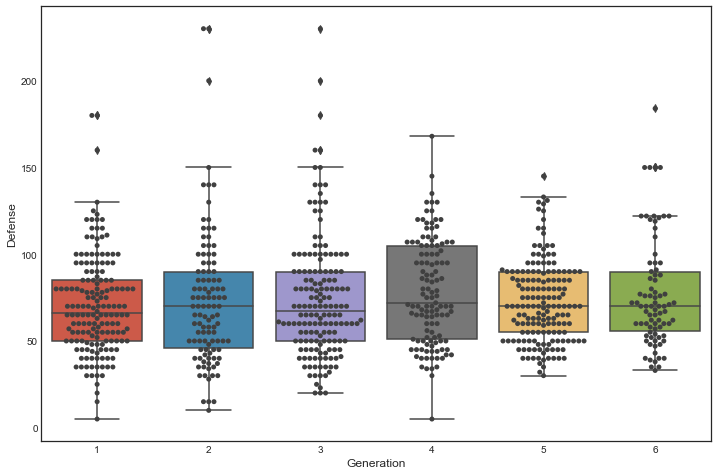

In [45]:
figure = plt.figure(figsize=(12,8))

sns.boxplot(y="Defense", x="Generation", data=orig)
ax = sns.swarmplot(x="Generation", y="Defense", data=orig, color=".25")

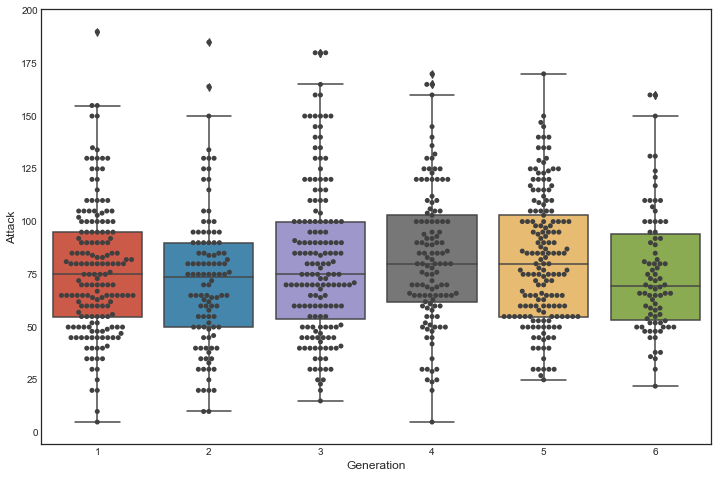

In [46]:


figure = plt.figure(figsize=(12,8))

sns.boxplot(y="Attack", x="Generation", data=orig)
ax = sns.swarmplot(x="Generation", y="Attack", data=orig, color=".25")



In [47]:
#   seen above 
#   generation effect on total , defense , attack

In [48]:
# similarly can be made for others

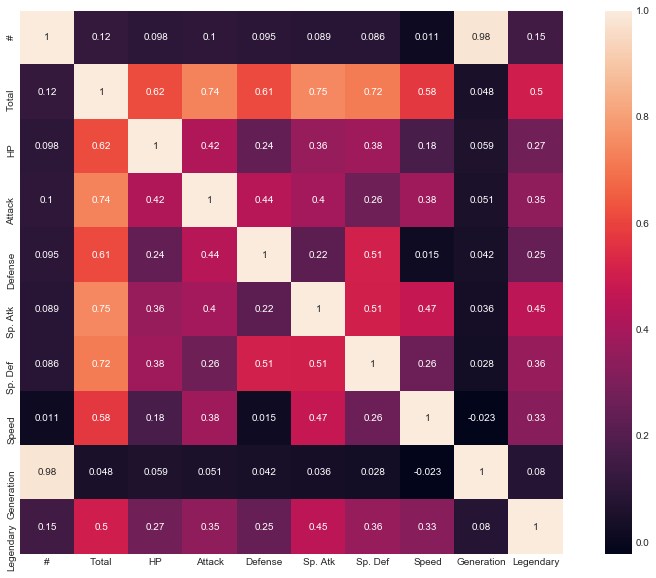

In [49]:
# heat map previously drawn can also be rendered like this in full square 
plt.figure(figsize=(15,10)) #manage the size of the plot
sns.heatmap(orig.corr(),annot=True, square = True) 
plt.show()

In [50]:
#  speed is also having negligible relation with defense

In [51]:
# now making some violin plots for
# attack vs type 1
# defense vs type 1
# total vs generation

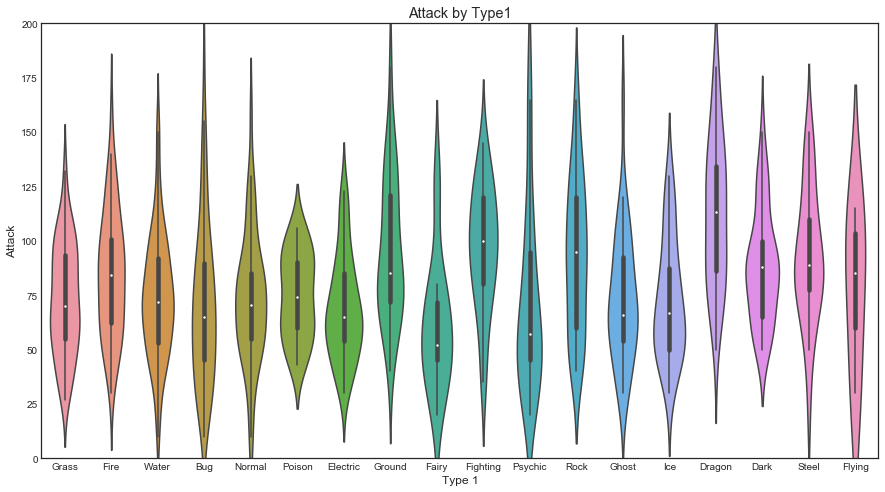

In [52]:
plt.subplots(figsize = (15,8))
plt.title('Attack by Type1')
sns.violinplot(x = "Type 1", y = "Attack",data = df)
plt.ylim(0,200)
plt.show()

In [53]:
# this clearly shows that dragon type is of highly attacking nature when considering higher attack points

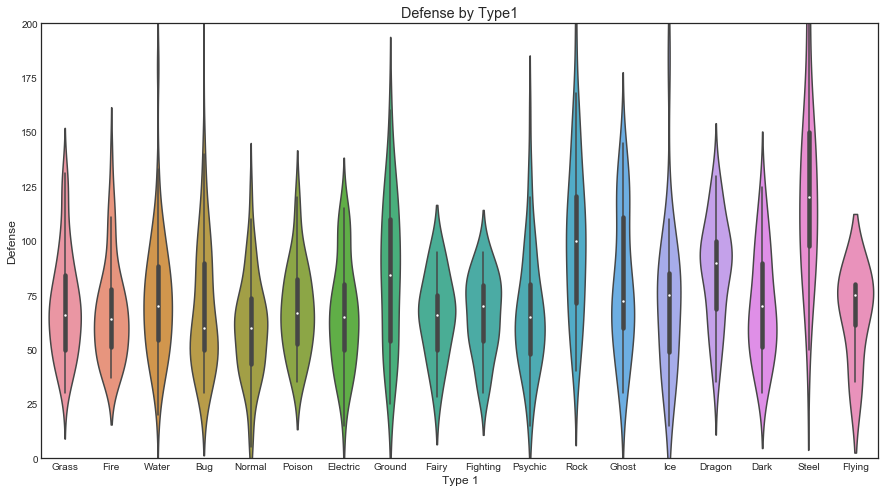

In [54]:
plt.subplots(figsize = (15,8))
plt.title('Defense by Type1')
sns.violinplot(x = "Type 1", y = "Defense",data = df)
plt.ylim(0,200)
plt.show()

In [55]:
# clearly shows that steel type is more of defensive nature

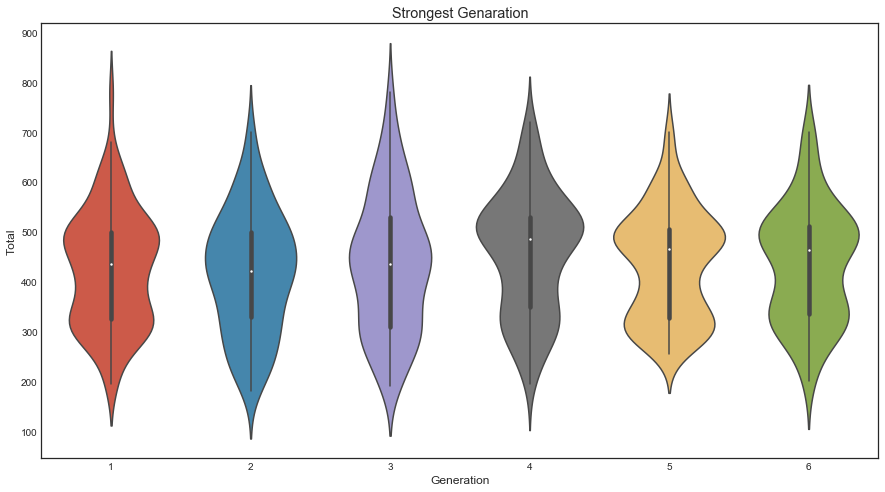

In [56]:
plt.subplots(figsize = (15,8))
plt.title('Strongest Genaration')
sns.violinplot(x = "Generation", y = "Total",data = orig)
plt.show()

In [57]:
# generation 3 is the strongest of all 

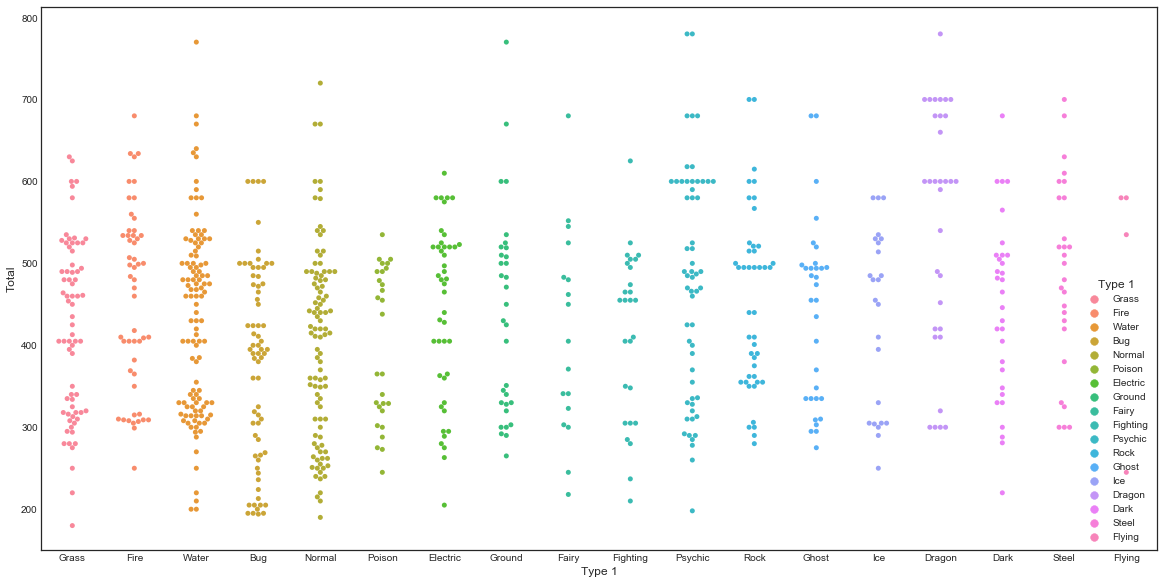

In [58]:
plt.subplots(figsize = (20,10))
sns.swarmplot(x="Type 1", y="Total", data=orig, hue="Type 1");

In [59]:
# each dot above represents a pokemon 

In [60]:
# now considering that whether legendary is having any effect on our data

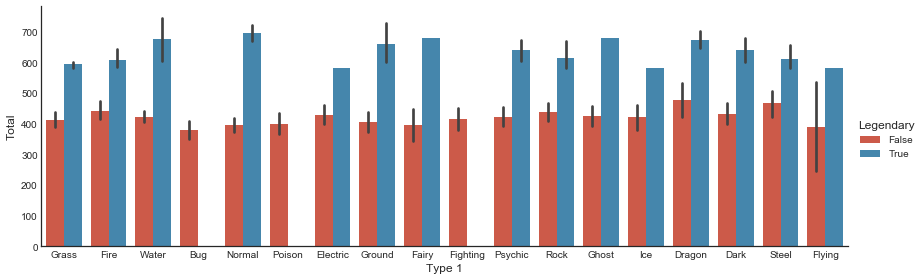

In [61]:


sns.factorplot(x="Type 1", y="Total", hue="Legendary",data=df, kind="bar",aspect=3,size=4)



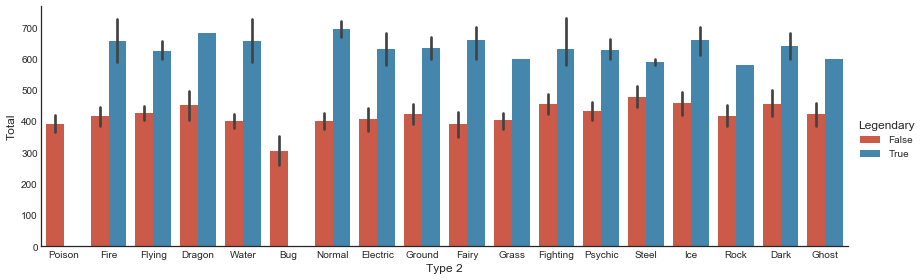

In [62]:
sns.factorplot(x="Type 2", y="Total", hue="Legendary",data=df, kind="bar",aspect=3,size=4)

In [63]:
# from above
# we can see that generally Legendary pokemons have more total than any of non legendary pokemon
#therefore we can not discard Legendary from data.



In [64]:
# Now lets compare any two pokemons of our choice

In [65]:
# Taking example as of CharizardMega Charizard X and MewtwoMega Mewtwo X

In [66]:
def Comp(pok1 , pok2):
    a = orig[(orig.Name == pok1) | (orig.Name == pok2)]
    sns.factorplot(x="Name", y="Total",data=a , kind="bar",aspect=2,size=3)
    sns.factorplot(x="Name", y="Attack",data=a, kind="bar",aspect=2,size=3)
    sns.factorplot(x="Name", y="HP",data=a, kind="bar",aspect=2,size=3)
    sns.factorplot(x="Name", y="Defense",data=a, kind="bar",aspect=2,size=3)
    sns.factorplot(x="Name", y="Sp. Atk",data=a, kind="bar",aspect=2,size=3)
    sns.factorplot(x="Name", y="Sp. Def",data=a, kind="bar",aspect=2,size=3)
    sns.factorplot(x="Name", y="Speed",data=a, kind="bar",aspect=2,size=3)

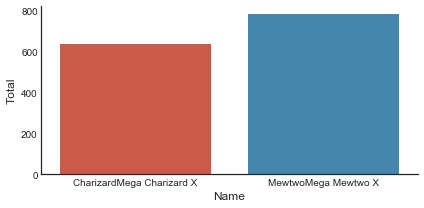

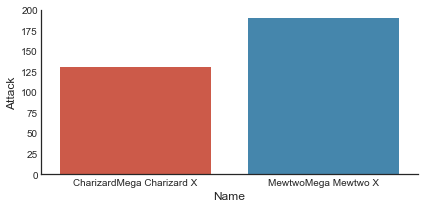

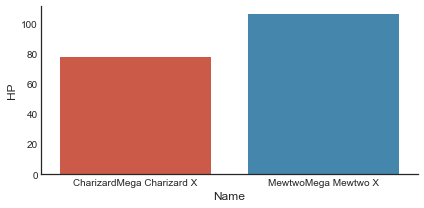

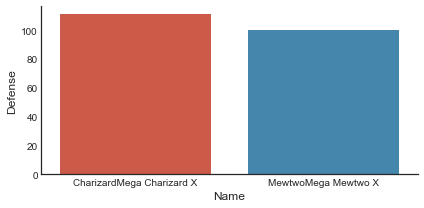

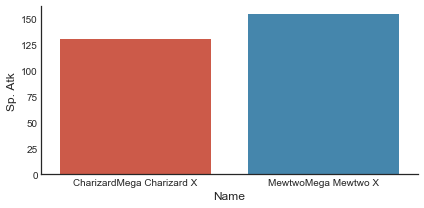

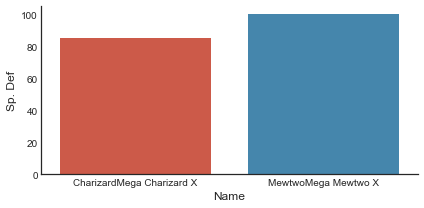

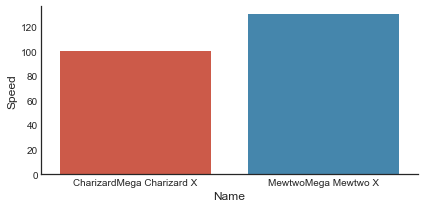

In [67]:
Comp("CharizardMega Charizard X" , "MewtwoMega Mewtwo X")

In [68]:
# similarly we can take any two and just compare them in various attributes

In [69]:
#  THANK YOU